# Program Assignment 1 Machine Learning

Problem and Task Understanding (30 points): Explain the problem you want to
solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.

We are given a dataset of student grades originating from different schools. The data collected ranges from the gender and age of the student to their frequency of absences alongside their grades. As the data we're going to predict is continuous, we will use regression to solve our problem of predicting the final grade (G3) of the students. 

To test our results, we will predict the final grade of a subject with the following details:
    a female, 
    19 y/o student,
    from Gabriel Pereira,
    living in an urban area,
    with a family of greater than 3 members (including the subject),
    both parents are living together, 
    both parents have higher education, 
    both work in civil services,
    subject's reason of her school decision is its close distance from home,
    subject's main guardian is be her father,
    subject's travel time is be <15 minutes,
    subject's study time is <2 hours,
    0 past class failures,
    no extra educational support,
    no family educational support,
    no extra paid classes,
    joins extra-curricular activities,
    attended nursery school,
    wants to take higher education,
    has internet access at home,
    no romantic relationships,
    decent (3) family relationship,
    very high free amount of free time,
    decent rate of nightouts with friends,
    very low workday alcohol consumption,
    very high weekend alcohol consumption,
    decent (3) health,
    no absences,
    a G1 score of 17,
    and, lastly, a G2 score of 18.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline


### Load Dataset

In [3]:
url = "https://raw.githubusercontent.com/HansJoachimW/AFL1-MachineLearning/main/Student%20Grade%20-%20Dataset.csv"
dataset = pd.read_csv(url)
dataset.sample(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
231     GP   M   17       R     GT3       T     2     2     other     other   
193     GP   M   16       R     GT3       T     3     3  services  services   
383     MS   M   19       R     GT3       T     1     1     other  services   
126     GP   F   15       U     LE3       A     3     4     other     other   
164     GP   M   17       R     LE3       T     1     1     other  services   
53      GP   F   15       U     GT3       T     4     4  services  services   
82      GP   F   15       U     LE3       T     3     2  services     other   
215     GP   F   17       U     LE3       T     3     2     other     other   
169     GP   F   16       U     GT3       T     4     4    health    health   
77      GP   F   16       U     GT3       T     2     2     other     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
231  ...      4        5      2     1     1      1        4  11  11  11  
193  ...      4        3      2     3     4      5        8   8   9  10  
383  ...      4        3      2     1     3      5        0   6   5   0  
126  ...      5        3      2     1     1      1        0   7  10  11  
164  ...      5        3      5     1     5      5        0   5   8   7  
53   ...      3        3      4     2     3      5        0   8  10  11  
82   ...      4        4      4     1     1      5       10   7   6   6  
215  ...      4        4      4     1     3      1        2  14  15  15  
169  ...      4        4      2     1     1      3        0  14  14  14  
77   ...      5        2      3     1     3      3        0  11  11  11  

[10 rows x 33 columns]

### Preprocessing Data

Since there are some data that's still in string and binary format, we decided to use LabelEncoder to convert those string and binaries to int so we can visualize and process the data.

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['school'] = le.fit_transform(dataset['school'].values)
dataset['sex'] = le.fit_transform(dataset['sex'].values)
dataset['address'] = le.fit_transform(dataset['address'].values)
dataset['famsize'] = le.fit_transform(dataset['famsize'].values)
dataset['Pstatus'] = le.fit_transform(dataset['Pstatus'].values)
dataset['Mjob'] = le.fit_transform(dataset['Mjob'].values)
dataset['Fjob'] = le.fit_transform(dataset['Fjob'].values)
dataset['reason'] = le.fit_transform(dataset['reason'].values)
dataset['guardian'] = le.fit_transform(dataset['guardian'].values)
dataset['schoolsup'] = le.fit_transform(dataset['schoolsup'].values)
dataset['famsup'] = le.fit_transform(dataset['famsup'].values)
dataset['paid'] = le.fit_transform(dataset['paid'].values)
dataset['activities'] = le.fit_transform(dataset['activities'].values)
dataset['nursery'] = le.fit_transform(dataset['nursery'].values)
dataset['higher'] = le.fit_transform(dataset['higher'].values)
dataset['internet'] = le.fit_transform(dataset['internet'].values)
dataset['romantic'] = le.fit_transform(dataset['romantic'].values)

dataset.head(n=10)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   
5       0    1   16        1        1        1     4     3     3     2  ...   
6       0    1   16        1        1        1     2     2     2     2  ...   
7       0    0   17        1        0        0     4     4     2     4  ...   
8       0    1   15        1        1        0     3     2     3     2  ...   
9       0    1   15        1        0        1     3     4     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  
5       5         4      2     1     2       5        10  15  15  15  
6       4         4      4     1     1       3         0  12  12  11  
7       4         1      4     1     1       1         6   6   5   6  
8       4         2      2     1     1       1         0  16  18  19  
9       5         5      1     1     1       5         0  14  15  15  

[10 rows x 33 columns]

### Checking NaN Data

Here we're making sure that there are no NaN (Not a Number) datas left in the dataset

In [5]:
dataset.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Exploratory Data Analysis (Univariate)

In [6]:
# Display the Univariate Data Characteristics 
dataset.describe()

school         sex         age     address     famsize     Pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.116456    0.473418   16.696203    0.777215    0.288608    0.896203   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    1.000000    0.000000    1.000000   
50%      0.000000    0.000000   17.000000    1.000000    0.000000    1.000000   
75%      0.000000    1.000000   18.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000   22.000000    1.000000    1.000000    1.000000   

             Medu        Fedu        Mjob        Fjob  ...      famrel  \
count  395.000000  395.000000  395.000000  395.000000  ...  395.000000   
mean     2.749367    2.521519    2.169620    2.281013  ...    3.944304   
std      1.094735    1.088201    1.227473    0.863542  ...    0.896659   
min      0.000000    0.000000    0.000000    0.000000  ...    1.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    4.000000   
50%      3.000000    2.000000    2.000000    2.000000  ...    4.000000   
75%      4.000000    3.000000    3.000000    3.000000  ...    5.000000   
max      4.000000    4.000000    4.000000    4.000000  ...    5.000000   

         freetime       goout        Dalc        Walc      health    absences  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.235443    3.108861    1.481013    2.291139    3.554430    5.708861   
std      0.998862    1.113278    0.890741    1.287897    1.390303    8.003096   
min      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%      3.000000    2.000000    1.000000    1.000000    3.000000    0.000000   
50%      3.000000    3.000000    1.000000    2.000000    4.000000    4.000000   
75%      4.000000    4.000000    2.000000    3.000000    5.000000    8.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000   75.000000   

               G1          G2          G3  
count  395.000000  395.000000  395.000000  
mean    10.908861   10.713924   10.415190  
std      3.319195    3.761505    4.581443  
min      3.000000    0.000000    0.000000  
25%      8.000000    9.000000    8.000000  
50%     11.000000   11.000000   11.000000  
75%     13.000000   13.000000   14.000000  
max     19.000000   19.000000   20.000000  

[8 rows x 33 columns]

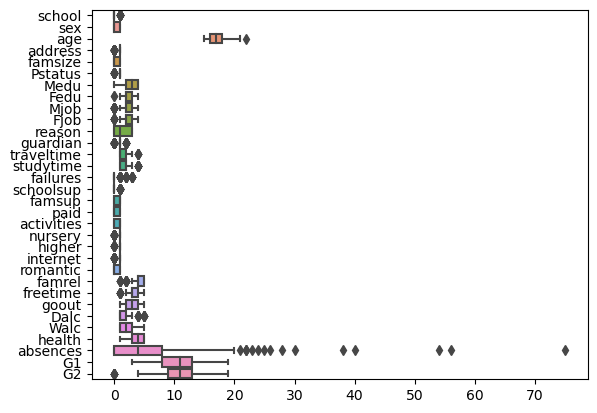

In [7]:
# Display Graphical Univariate EDA using box plot to analyze data distribution
sns.boxplot(data=dataset.drop(columns=['G3']), orient='h')
plt.show()

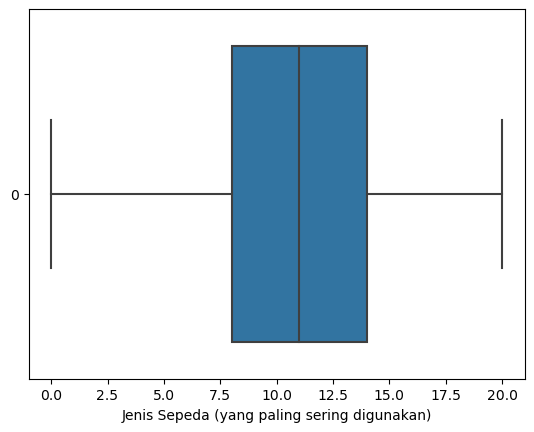

In [8]:
# Display a separate boxplot for 'G3' 
sns.boxplot(data=dataset["G3"],orient="h")
plt.xlabel('Jenis Sepeda (yang paling sering digunakan)')
plt.show()

### Exploratory Data Analysis (Multivariate)

In [9]:
# Display the Multivariate EDA using pair plot
sns.pairplot(data=dataset, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.show()

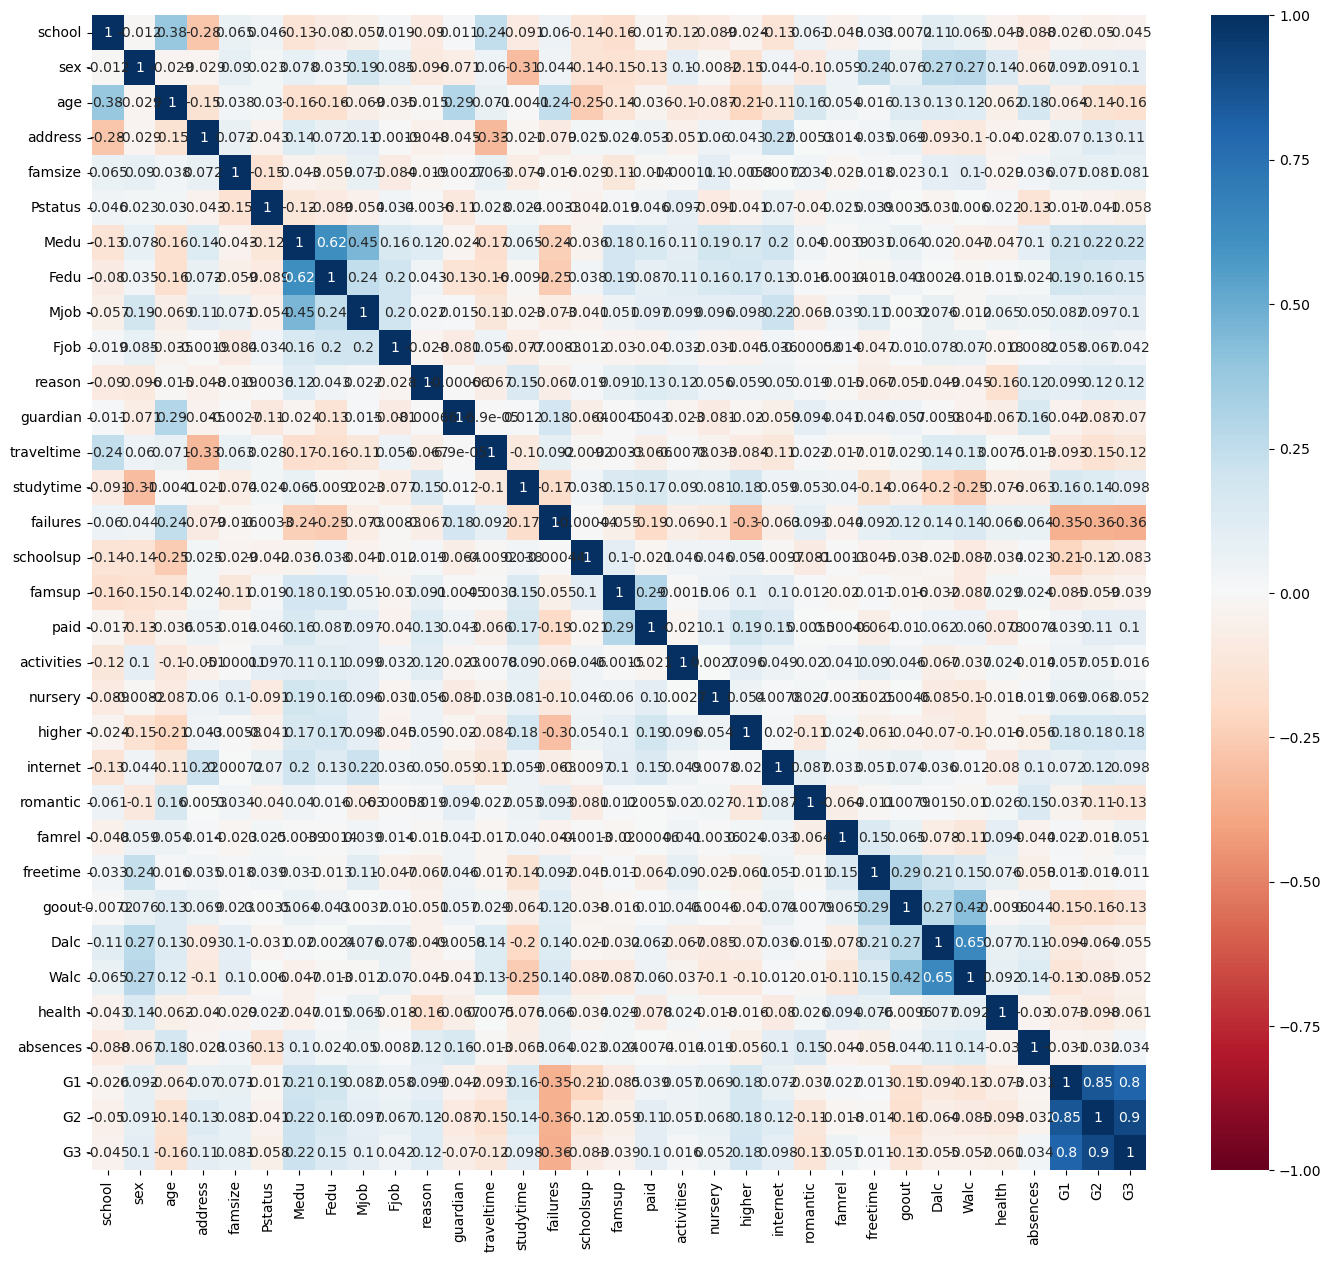

In [10]:
# Display the correlation strength and direction using heatmap
plt.subplots(figsize=(17,15))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

### Deciding The Independent And Dependent Variable

In [11]:
# Asumsi X adalah kolom yang diletakkan dari kolom kiri, kecuali paling kanan
X = dataset.iloc[:, :-1].values

# Asumsi X adalah dependent variable paling kanan
y = dataset.iloc[:, -1].values

### Split The Dataset To Training Data dan Test Data
Train test split is a model validation process that allows you to simulate how your model would perform with new data.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Scaling

We can see from the boxplot that the scales of some of the data are different, so we're going to use Standard Scaler

In [13]:
#Standard Scaler need to be used when the scale are different
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Create The Regression Model Based On The Training Data

We use the Random Forest Regression Model based on our previous calculations of each model which deduced that the Random Forest Regression Model had the most accuracy

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
 
# Create a random forest regression model
model = RandomForestRegressor()

# We set the values of n_estimators we'd like to evaluate to reduce error
param_grid = {'n_estimators': [10, 50, 100, 200]}

# We use GridSearchCV as a hyperparamater tuning technique to find the best amount of n_estimators based on RMSE
num_iterations = 5
avg_best_n_estimators = 0

# To help (not completely) against the randomness of the random forest regression model we find the average of the results
for _ in range(num_iterations):
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error') 
    grid_search.fit(X_train, y_train)
    avg_best_n_estimators += grid_search.best_params_['n_estimators']

avg_best_n_estimators /= num_iterations
print(f"Average Best n_estimators: {avg_best_n_estimators}")

# Create a custom random forest regression model with the best n_estimator value
model = RandomForestRegressor(n_estimators=int(avg_best_n_estimators))

# Fit the model to the data
model.fit(X_train, y_train)
 
# Predict the response for a new data point
y_pred = model.predict(X_test)

Average Best n_estimators: 130.0


### Visualize A Single Decision Tree

In [18]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = model.estimators_[5]

# Pull out one tree from the forest
tree = model.estimators_[5]

# Export the image to a dot file
feature_list = list((dataset.drop('G3', axis = 1)).columns)
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
graph = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

True

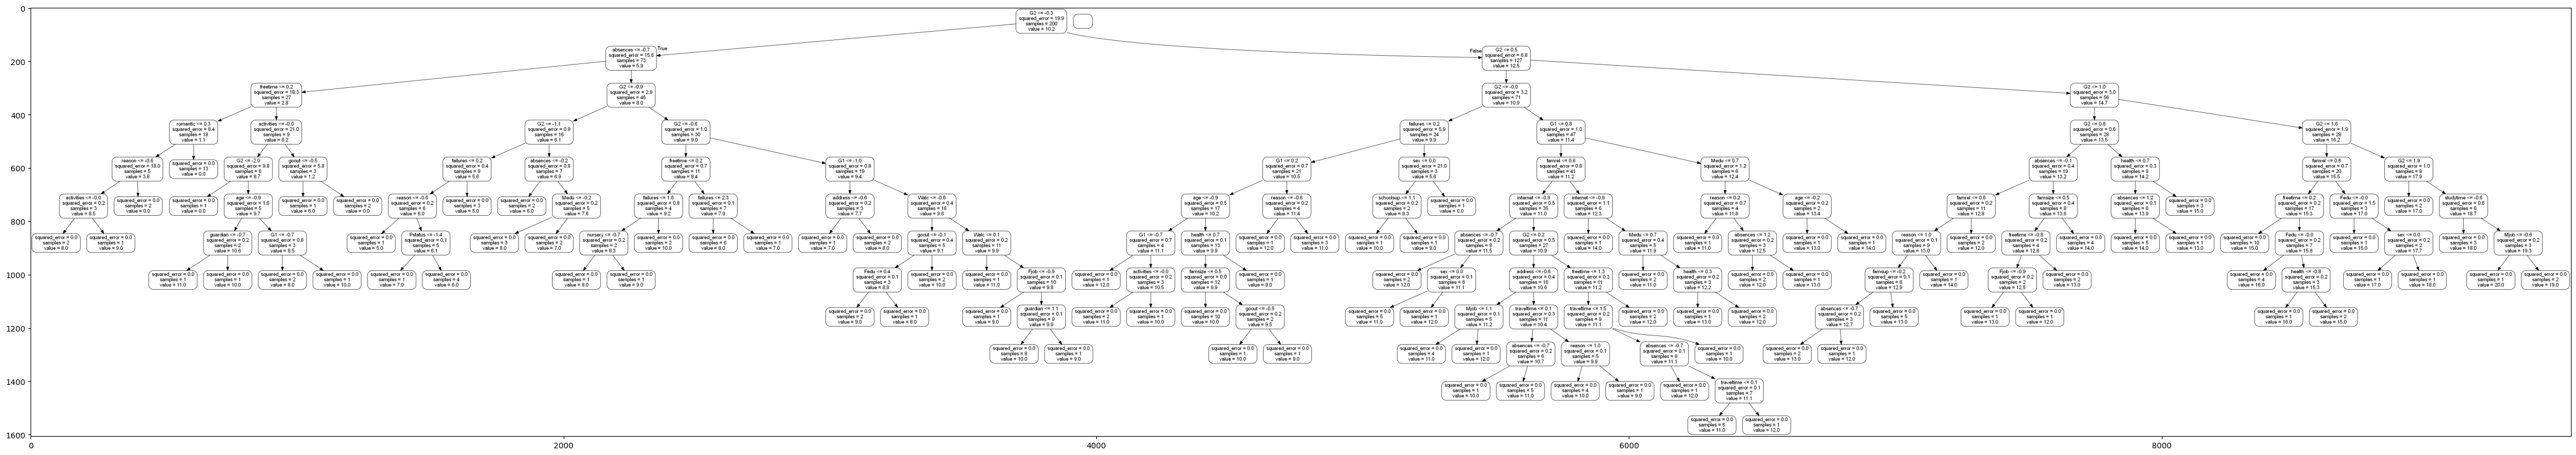

In [19]:
from PIL import Image

img = Image.open('tree.png')
plt.figure(figsize=(120, 10))
plt.imshow(img)

### Calculating The OOB Score

The OOB Score is a way to estimate the Random Forests performance, the resulting OOB error means that, on average, the predictions made by the random forest model on the out-of-bag samples (samples not used in the construction of the individual trees) have only 12.05% error rate.

In [20]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(n_estimators=int(avg_best_n_estimators), oob_score=True, random_state=0)
RandomForest.fit(X,y)
print("OOB Error: %0.4f" % (1 - RandomForest.oob_score_))
print("Error Rate: %0.4f" % ((1 - RandomForest.oob_score_) * 100), "%")

OOB Error: 0.1207
Error Rate: 12.0708 %


### Test The Predicted Value Using Test Data

In [15]:
evaluate = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
evaluate.head()

y_test     y_pred
0      14  14.246154
1      10  11.238462
2       9  10.138462
3      15  15.892308
4      16  15.830769

### Evaluating the Model Fit using RMSE, MSE, and MAE

Here we evaluate the regression model using the evaluation metrics for regression which are RMSE, MAE, and MSE.

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Using RMSE
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Using MAE and MSE
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 1.8502
MAE: 1.10
MSE: 3.42


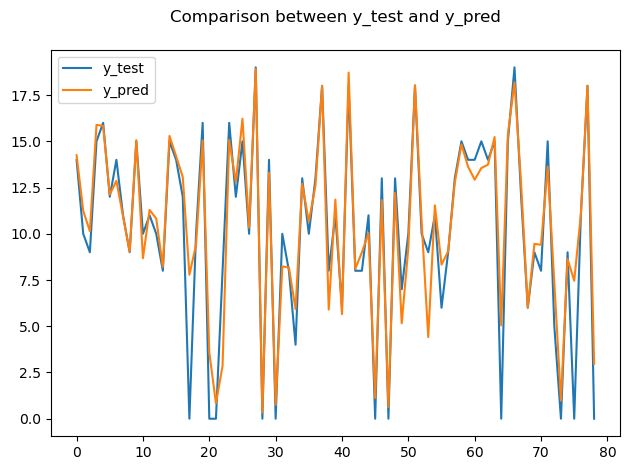

In [17]:
# Visualize the comparison between y_test and y_pred to depict the error margin
evaluate.plot(kind='line')
plt.title('Comparison between y_test and y_pred', pad=20)
plt.tight_layout()
plt.show()

### Final Prediction

We will predict the final grade of a subject with the following details:
    a female, 
    19 y/o student,
    from Gabriel Pereira,
    living in an urban area,
    with a family of greater than 3 members (including the subject),
    both parents are living together, 
    both parents have higher education, 
    both work in civil services,
    subject's reason of her school decision is its close distance from home,
    subject's main guardian is be her father,
    subject's travel time is be <15 minutes,
    subject's study time is <2 hours,
    0 past class failures,
    no extra educational support,
    no family educational support,
    no extra paid classes,
    joins extra-curricular activities,
    attended nursery school,
    wants to take higher education,
    has internet access at home,
    no romantic relationships,
    decent (3) family relationship,
    very high free amount of free time,
    decent rate of nightouts with friends,
    very low workday alcohol consumption,
    very high weekend alcohol consumption,
    decent (3) health,
    no absences,
    a G1 score of 17,
    and, lastly, a G2 score of 18.

In [21]:
input_data = pd.DataFrame({
    'school': ['GP'],
    'sex': ['F'],
    'age': [19],
    'address': ['U'],
    'famsize': ['GT3'],
    'Pstatus': ['T'],
    'Medu': [4],
    'Fedu': [4],
    'Mjob': ['services'],
    'Fjob': ['services'],
    'reason': ['home'],
    'guardian': ['father'],
    'traveltime': [1],
    'studytime': [1],
    'failure': [0],
    'schoolsup': ['no'],
    'famsup': ['no'],
    'paid': ['no'],
    'activities': ['yes'],
    'nursery': ['yes'],
    'higher': ['yes'],
    'internet': ['yes'],
    'romantic': ['no'],
    'famrel': [3],
    'freetime': [5],
    'goout': [3],
    'Dalc': [1],
    'Walc': [5],
    'health': [3],
    'absences': [0],
    'G1': [17],
    'G2': [18]
})

input_data['school'] = le.fit_transform(input_data['school'].values)
input_data['sex'] = le.fit_transform(input_data['sex'].values)
input_data['address'] = le.fit_transform(input_data['address'].values)
input_data['famsize'] = le.fit_transform(input_data['famsize'].values)
input_data['Pstatus'] = le.fit_transform(input_data['Pstatus'].values)
input_data['Mjob'] = le.fit_transform(input_data['Mjob'].values)
input_data['Fjob'] = le.fit_transform(input_data['Fjob'].values)
input_data['reason'] = le.fit_transform(input_data['reason'].values)
input_data['guardian'] = le.fit_transform(input_data['guardian'].values)
input_data['schoolsup'] = le.fit_transform(input_data['schoolsup'].values)
input_data['famsup'] = le.fit_transform(input_data['famsup'].values)
input_data['paid'] = le.fit_transform(input_data['paid'].values)
input_data['activities'] = le.fit_transform(input_data['activities'].values)
input_data['nursery'] = le.fit_transform(input_data['nursery'].values)
input_data['higher'] = le.fit_transform(input_data['higher'].values)
input_data['internet'] = le.fit_transform(input_data['internet'].values)
input_data['romantic'] = le.fit_transform(input_data['romantic'].values)

final_prediction = model.predict(input_data)
print("Predicted Final Grade: ", final_prediction)

Predicted Final Grade:  [18.44615385]


C:\Users\miche\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
